In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston/calendar.csv
/kaggle/input/boston/listings.csv
/kaggle/input/boston/reviews.csv


**Business Understanding**\
 *Business objectives and goals:*
  1. What are the busiest times of the year to visit Boston? By how much do prices spike?
  2. How does pricing vary based on different factors?
  3. Can we predict the popularity of a listing based on certain features?

**Data Understanding**\
**Data Preparation **\
 *Tasks*
  * Preprocess the data by handling missing values, outliers, and any necessary cleaning.
  *  Merge relevant information from different datasets if needed.
  * Convert data types, handle categorical variables, and create new features if necessary.
  
**Data Modeling**\
 *Approach:*
  * Regression models for predicting pricing.
  * Classification models for predicting the popularity of a listing.
  
**Evaluation**\
 *Metrics:*
  Using relevant metrics to assess the model's performance in predicting listing popularity.
  
 *Potential Questions:*
  * How well does the model predict the popularity of listings?
  * What features contribute the most to the prediction?



***Data Understanding***

Calendar Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB
None

Listings Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   obj

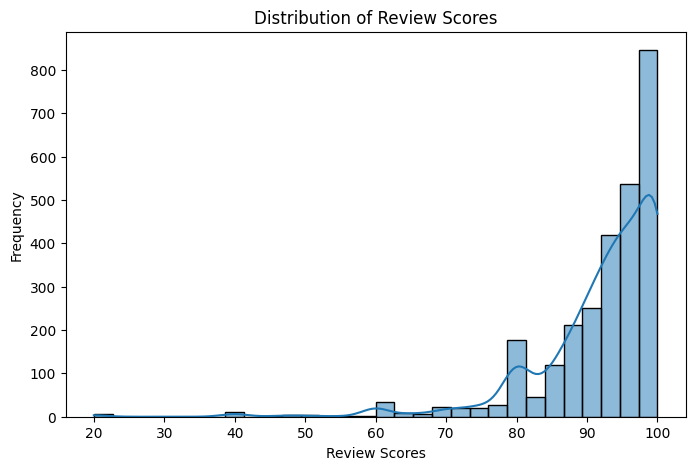

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
calendar = pd.read_csv('/kaggle/input/boston/calendar.csv')
listings = pd.read_csv('/kaggle/input/boston/listings.csv')
reviews = pd.read_csv('/kaggle/input/boston/reviews.csv')

# Display basic information about each dataset
print("Calendar Dataset:")
print(calendar.info())
print("\nListings Dataset:")
print(listings.info())
print("\nReviews Dataset:")
print(reviews.info())

# Display the first few rows of each dataset to get a glimpse of the data
print("\nFirst few rows of Calendar Dataset:")
print(calendar.head())
print("\nFirst few rows of Listings Dataset:")
print(listings.head())
print("\nFirst few rows of Reviews Dataset:")
print(reviews.head())

# Summary statistics for numerical columns
print("\nSummary statistics for Calendar Dataset:")
print(calendar.describe())
print("\nSummary statistics for Listings Dataset:")
print(listings.describe())
print("\nSummary statistics for Reviews Dataset:")
print(reviews.describe())

# Visualize data distribution and relationships
# Example: Histogram of review scores in the Listings dataset
plt.figure(figsize=(8, 5))
sns.histplot(listings['review_scores_rating'], bins=30, kde=True)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Scores')
plt.ylabel('Frequency')
plt.show()


***Preparation***

In [4]:
# Convert date columns to datetime
calendar['date'] = pd.to_datetime(calendar['date'])
listings['host_since'] = pd.to_datetime(listings['host_since'])
reviews['date'] = pd.to_datetime(reviews['date'])


**Modeling**

***What are the busiest times of the year to visit Boston? By how much do prices spike?***

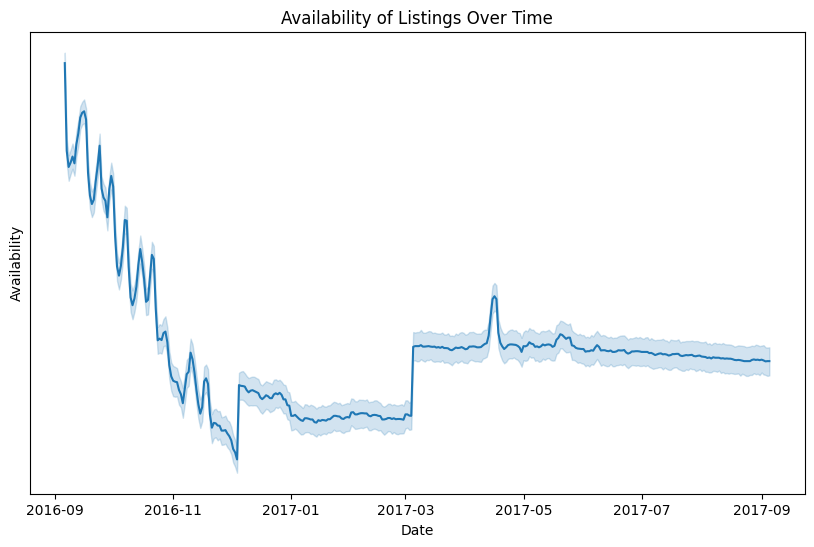

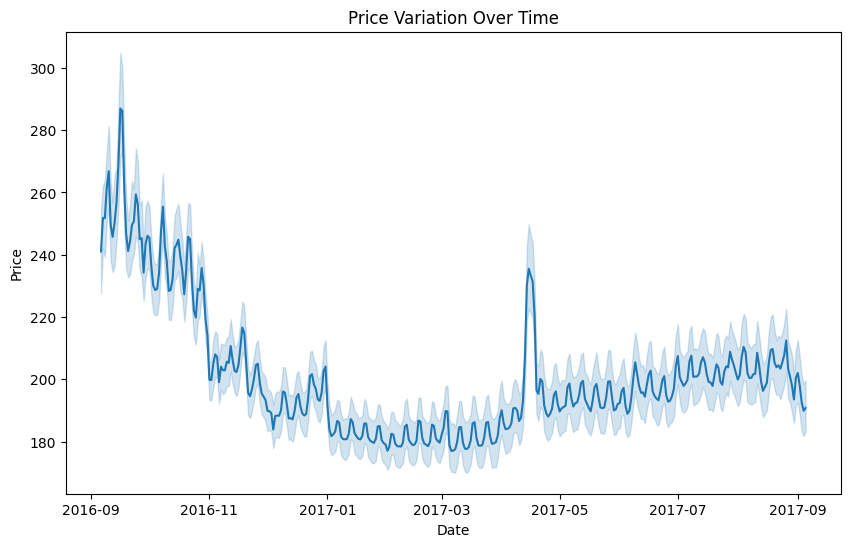

In [5]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Explore availability and prices over time
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)

# Visualize availability over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='available', data=calendar)
plt.title('Availability of Listings Over Time')
plt.xlabel('Date')
plt.ylabel('Availability')
plt.show()

# Visualize price spikes
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='price', data=calendar)
plt.title('Price Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


***How does pricing vary based on different factors?***

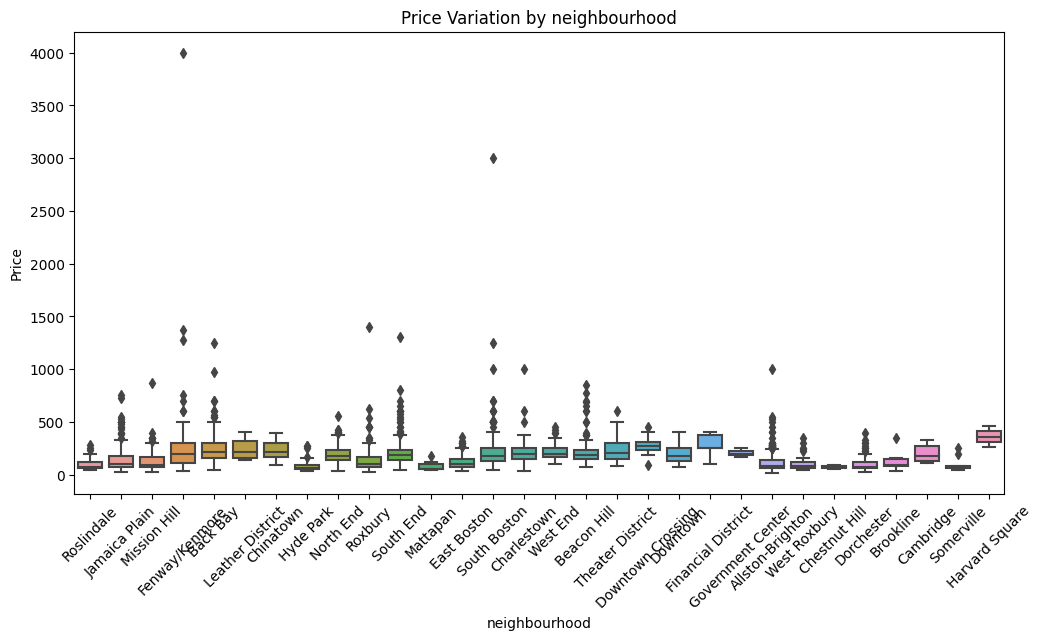

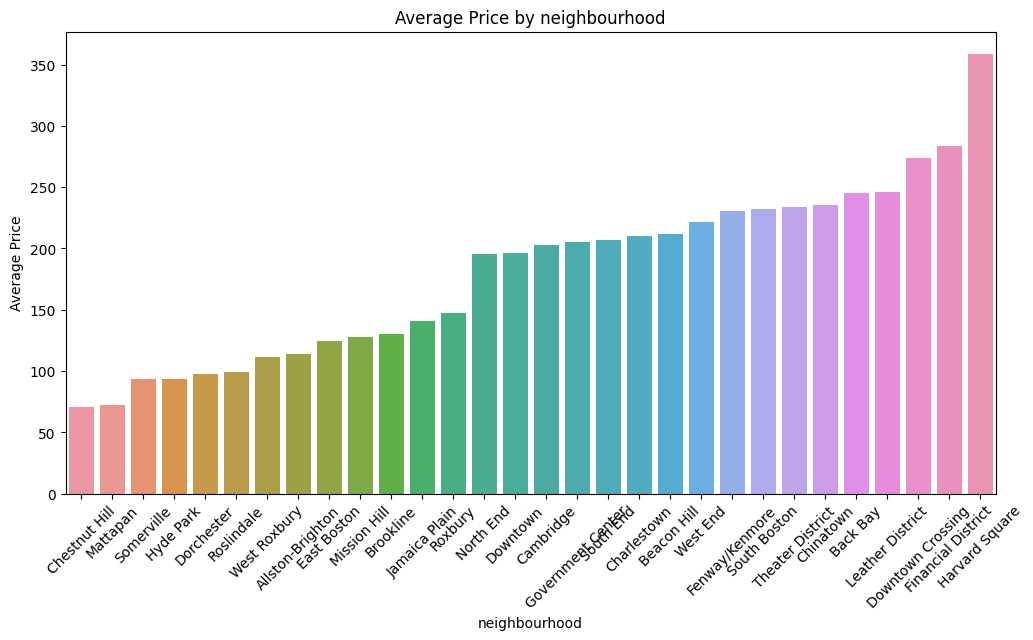

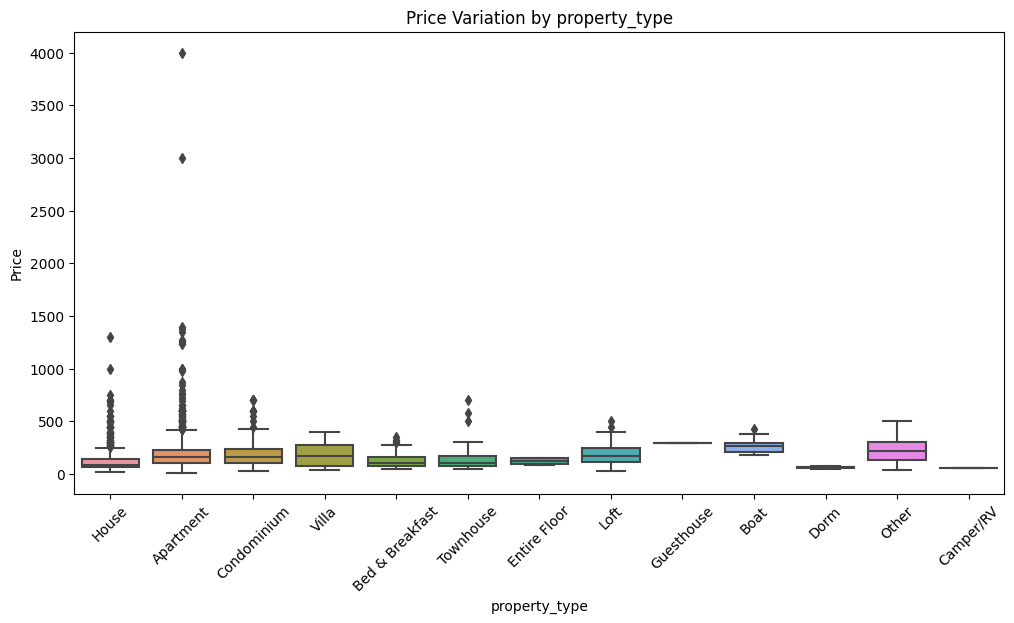

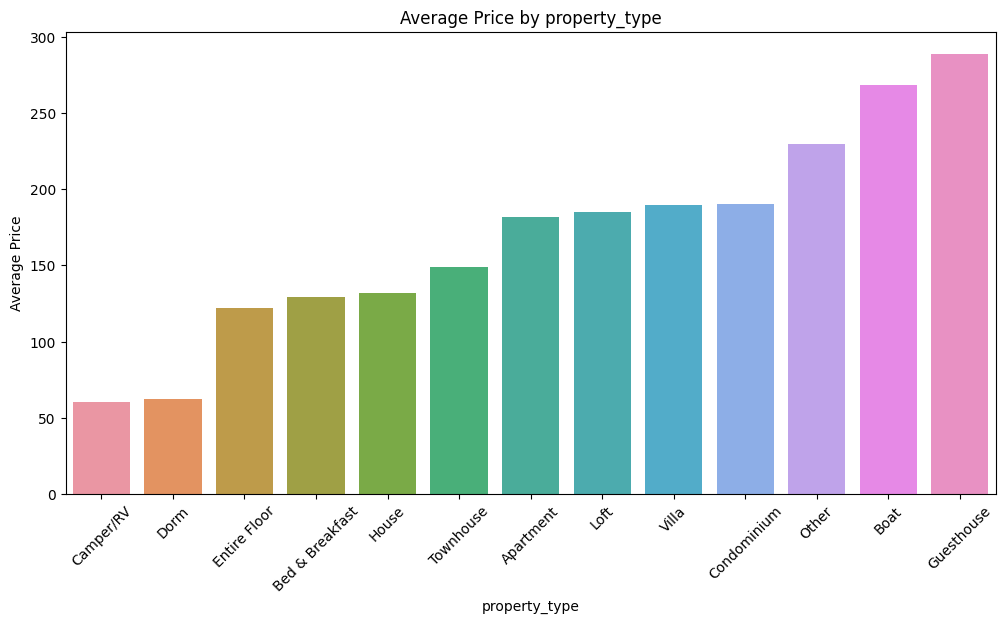

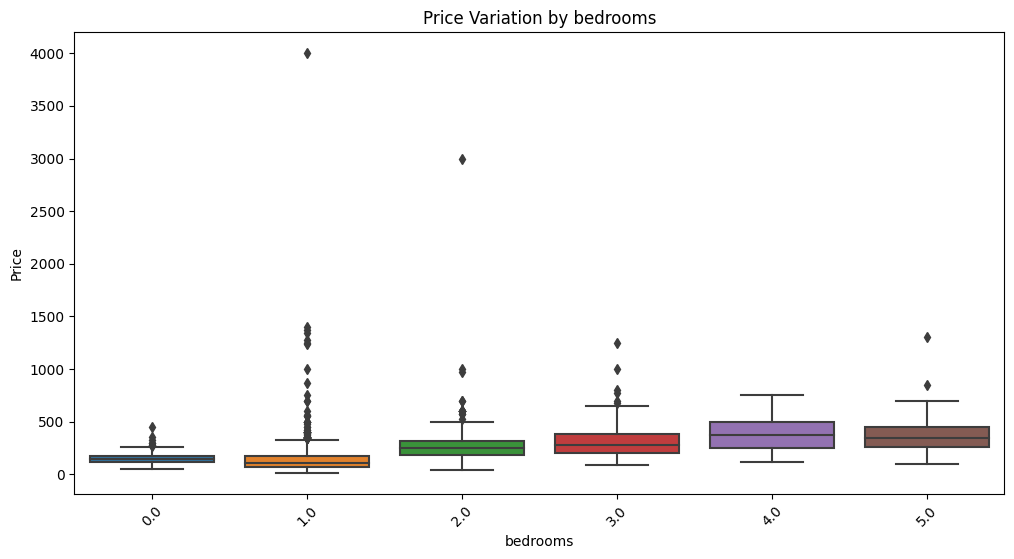

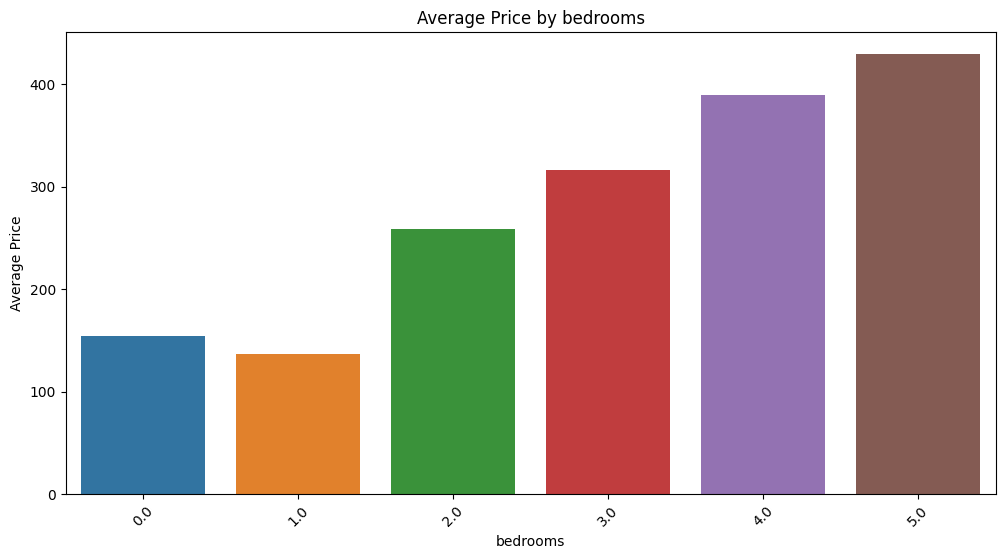

In [9]:
# Convert 'price' column to numeric format
listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)

# Visualize pricing based on different factors
factors_to_explore = ['neighbourhood', 'property_type', 'bedrooms']

for factor in factors_to_explore:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=factor, y='price', data=listings)
    plt.title(f'Price Variation by {factor}')
    plt.xlabel(factor)
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.show()
    
    # Visualize average price by factor
    avg_price = listings.groupby(factor)['price'].mean().sort_values()
    plt.figure(figsize=(12, 6))
    sns.barplot(x=avg_price.index, y=avg_price.values)
    plt.title(f'Average Price by {factor}')
    plt.xlabel(factor)
    plt.ylabel('Average Price')
    plt.xticks(rotation=45)
    plt.show()

Mean Squared Error: 1221.945410137011


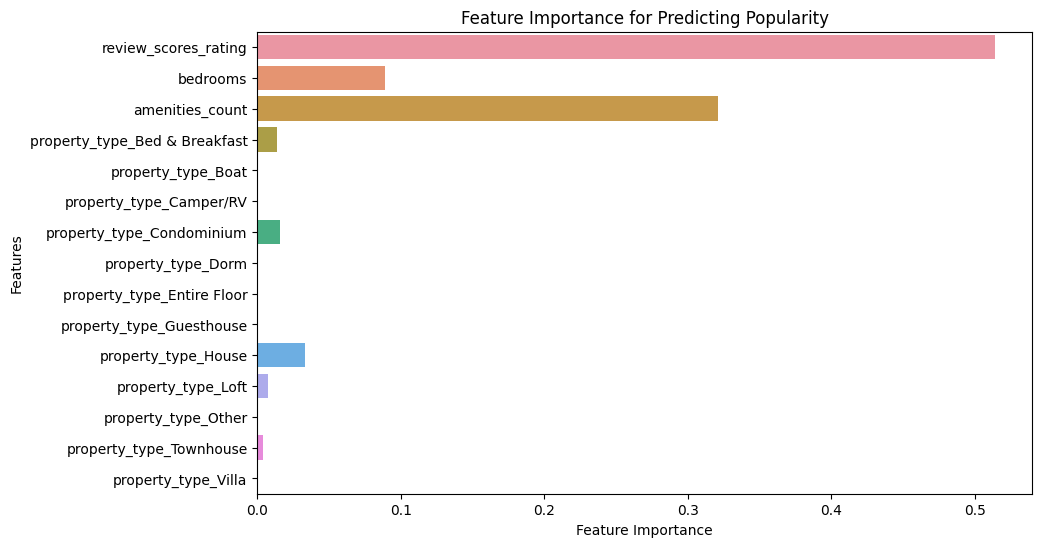

In [8]:
# Define popularity (e.g., number of reviews)
listings['popularity'] = listings['number_of_reviews']

# Explore potential features
features = ['review_scores_rating', 'amenities', 'property_type', 'bedrooms']

# Preprocess data
X = listings[features].copy()
X['amenities_count'] = X['amenities'].apply(lambda x: len(x.split(',')))
X = X.drop(['amenities'], axis=1)
X = pd.get_dummies(X, columns=['property_type'], drop_first=True)
X = X.fillna(0)

y = listings['popularity']

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train model (Random Forest for example)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize feature importance
feature_importance = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Feature Importance for Predicting Popularity')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()


**Evaluation**

*Mean Squared Error (MSE)* : 
This metric measures the average squared difference between predicted and actual values.

In [10]:
from sklearn.metrics import mean_squared_error

# Assuming y_test and y_pred are the actual and predicted popularity values
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 1221.945410137011


*R-squared (R2) Score:*
This computes the R-squared score to measure the proportion of the variance in the dependent variable (popularity) that is predictable from the independent variables (features)

In [11]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2}')


R-squared Score: 0.06949598055033557


**Feature Importance Analysis:**
Analyze the feature importances derived from the trained model to understand which features contribute the most to the prediction.

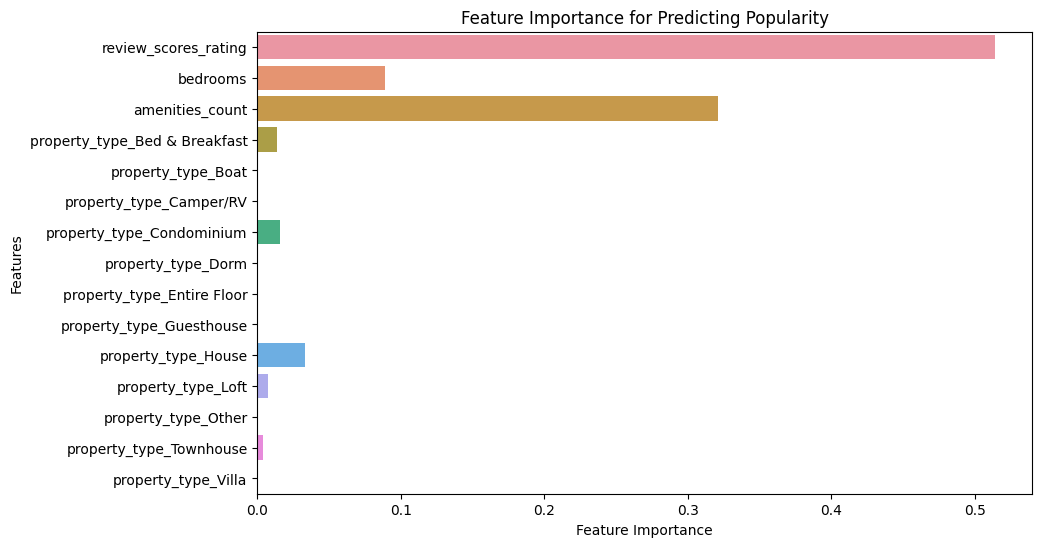

In [12]:
# Assuming 'model' is the trained model
feature_importance = model.feature_importances_
feature_names = X.columns

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Feature Importance for Predicting Popularity')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()


**Interpretation:**
The model's performance, as indicated by the MSE and R-squared score, might not be very high. A lower MSE and a higher R-squared score are generally desirable.
The R-squared score of 0.0695 suggests that the features used in the model explain only a small portion of the variability in listing popularity. It indicates that there might be other factors influencing popularity that are not captured by the current set of features.